# Result Evaluator

In [78]:
import json, yaml
from pathlib import Path
import numpy as np
from collections import namedtuple
import matplotlib.pyplot as plt

In [79]:
from utils import *

# enable auto reload
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
from utils import make_plot

Definition of experiment paths: 

In [81]:
# Multiruns for re-init sensitivity study
run_2024_03_15_22_37_44 = Path("/home/blei/cloud_track/evaluation/multirun/2024-03-15/22-37-44")

## Parameter optimization
# localhost
run_2024_04_23_16_44_02 = Path("/home/blei/cloud_track/evaluation/multirun/2024-04-23/16-44-02")
# jetson nano -> Ist ok, aber noch mit altem backend
jetson_nano_altes_backend = Path("/home/blei/cloud_track/evaluation/archive/jetson_nano_runs/2024-06-04/13-46-46")
# rpi -> Ist kaputt, mit altem backend
rpi_altes_backend = Path("/home/blei/cloud_track/evaluation/archive/rpi_runs/2024-05-03/16-41-03")
#jetson orin new backend
jetson_orin_neues_backend = Path("/home/blei/cloud_track/evaluation/archive/jetson_orin_runs/multirun/2024-09-10/03-26-04")
# rpi new backend
rpi_neues_backend = Path("/home/blei/cloud_track/evaluation/archive/rpi_runs/final/01-49-47")


# CV Tracker first try
multirun_first_try = Path("/home/blei/cloud_track/evaluation/multirun/2024-04-17/16-43-06")
better_reinit = Path("/home/blei/cloud_track/outputs/2024-04-17/15-44-51")

# Runs for Naive baseline
run_2024_03_22_14_18_00 = Path("/home/blei/cloud_track/evaluation/archive/outputs/2024-03-22/14-18-00")

# Runs for Deva
run_2024_04_02_16_26_20 = Path("/home/blei/cloud_track/evaluation/archive/outputs/2024-04-02/16-26-20")

# select the run to analyze
re_init_sensitivity_study = multirun_first_try
naive_baseline = run_2024_03_22_14_18_00
deva_baseline = run_2024_04_02_16_26_20
#parameter_optimization = run_2024_04_23_16_44_02

mode = "pi"
if mode == "jetson":
    parameter_optimization = jetson_orin_neues_backend
elif mode == "pi":
    parameter_optimization = rpi_neues_backend
else:
    raise ValueError("Mode not supported")

## Detailed Analxsis:

#### General Layout of the dict:
Multirun: 

```
├── runs
|   ├── 0
|   ├── 1
|   ├── 2
|   ├── 3
|   |   ├── hydra_config
|   |   |   ├── <hydra config stuff of the run>
|   |   ├── raw_data
|   |   |   ├── agility (sequence name)
|   |   |   |   ├── raw_data
|   |   |   |   |   ├──[list of frames]: frame 1
|   |   |   |   |   ├──[list of frames]: frame 2
|   |   |   |   |   |   ├── frame_id
|   |   |   |   |   |   ├── gt
|   |   |   |   |   |   ├── box
|   |   |   |   |   |   ├── timestamp
|   |   |   |   |   ├── ...
|   |   |   ├── ...
|   |   ├── iou # the mean iou
|   |   ├── frames # the number of frames
|   ├── ...
```   

#### global data for comparison

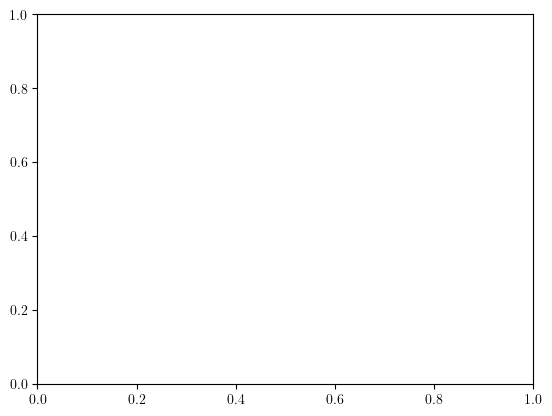

In [82]:
fig_glob, ax_glob = plt.subplots()

 # Flextrack

### Parameter Optimization

In [83]:
# Load the multirun data
multirun_data, mot_metrics_summary = multirun_pipeline(parameter_optimization)



/home/blei/cloud_track/.direnv/python-3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/blei/cloud_track/.direnv/python-3.10/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


make free fps


In [84]:

t_b_overall = []
all_t_b = []
backend_calls_per_run = []
keys = list(multirun_data.keys())

# turn the string keys into integers, sort them and turn them back into strings
# remove the keys ["00","01","02"]
keys = [key for key in keys if key not in ["00","01","02"]]
keys = [str(key) for key in sorted([int(key) for key in keys])]

for run_idx in keys:
    run = multirun_data[run_idx]["raw_data"]
    t_b = []
    for episode in run:
        episode = run[episode]
        for idx, frame in enumerate(episode["raw_data"]):
            if idx == 0:
                old_t = frame["timestamp"]
                continue
            if frame["is_fm_frame"]:
                t_b.append(frame["timestamp"] - old_t)
                t_b_overall.append(frame["timestamp"] - old_t)
            old_t = frame["timestamp"]
    all_t_b.append(t_b)
    backend_calls_per_run.append(len(t_b))
    

In [85]:
len(t_b_overall)
len(backend_calls_per_run)

average_tb_per_run = [np.mean(t_b) for t_b in all_t_b]
# keep only the first 10 entries
average_tb_per_run_first_n = average_tb_per_run[:10]
average_backend_tb = np.mean(average_tb_per_run_first_n)
print(f"Average time between backend calls: {average_backend_tb}s")

Average time between backend calls: 1.4108169359449025s


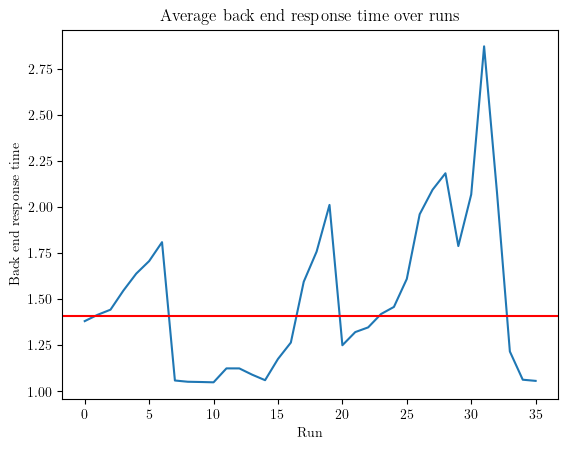

In [86]:
#plot all tb values. X axis is the frame number, y axis is the tb value
# plot a horizontal line at the average tb value
plt.plot(average_tb_per_run)
plt.axhline(average_backend_tb, color='r')
plt.xlabel("Run")
plt.ylabel("Back end response time")
plt.title("Average back end response time over runs")
plt.show()




In [87]:
relevant_keys = ["iou", "fps", "motp", "free_fps"]
sensitivity_study_performance = gather_data_from_runs(multirun_data, relevant_keys)


Run 7 not found.
Run 8 not found.
Run 9 not found.
Run 10 not found.
Run 11 not found.
Run 12 not found.
Run 41 not found.
Run 42 not found.
Run 43 not found.
Run 44 not found.
Run 45 not found.
Run 46 not found.
Run 47 not found.
Run 48 not found.
Run 49 not found.
Run 50 not found.
Run 51 not found.
Run 52 not found.
Run 53 not found.
Run 54 not found.
Run 55 not found.
Run 56 not found.
Run 57 not found.
Run 58 not found.
Run 59 not found.
Run 60 not found.
Run 61 not found.
Run 62 not found.
Run 63 not found.
Run 64 not found.
Run 65 not found.
Run 66 not found.
Run 67 not found.
Run 68 not found.
Run 69 not found.
Run 70 not found.
Run 71 not found.
Run 72 not found.
Run 73 not found.
Run 74 not found.
Run 75 not found.
Run 76 not found.
Run 77 not found.


In [88]:
# delete all runs that have a free_fps of None
for key in list(sensitivity_study_performance.keys()):
    if sensitivity_study_performance[key]["free_fps"] == None:
        del sensitivity_study_performance[key]

In [89]:
import matplotlib

def make_plot_old(sensitivity_study_performance, key_x, key_y, ax_glob, add_to_global: bool = False, tex_mode = False, preset="jetson"):
    # scatter plot 
    def dict_to_np_array(dict_in, key):
        """
        Converts a dictionary with arrays to a numpy array.
        """
        x = []
        for run in sorted(dict_in.keys()):
            x.append(dict_in[run][key])
        return np.array(x)
    
    # color legend: yellow, green, blue for the three different trackers
    #colors = ["tab:green", "tab:blue", "tab:orange"]
    # do the same without tab:
    colors = ["limegreen", "cornflowerblue", "chocolate"]
    # add light green, light blue, light orange
    colors_marker = ["tab:green", "tab:blue", "tab:orange"]
    #colors_marker = colors
    
    
    # start and end marker of the curve
    start_marker = "."
    end_marker = "x"
    middle_marker = ""
    

    # generate legend
    legend = []
    thresholds = []
    for run in sorted(sensitivity_study_performance.keys()):
        legend.append(sensitivity_study_performance[run]["hydra_config"]["cv_tracker"]["name"])
        thresholds.append(sensitivity_study_performance[run]["hydra_config"]["cv_tracker"]["threshold"])

    x = dict_to_np_array(sensitivity_study_performance, key_x)
    y = dict_to_np_array(sensitivity_study_performance, key_y)

    # get a set of unique values
    legend_set = list(set(legend))

    # Local Diagram
    fig, ax = plt.subplots()
    # set x limit to 0 to 60
    if preset == "jetson":
        ax.set_xlim(-2, 58)
    elif preset == "pi":
        ax.set_xlim(-2, 28) # CHANGE THIS!!!!
    
    fig.set_size_inches(3.4,3.4) # 3.4 inch is the width of a column in a two column paper
    for tracker in legend_set:
        x_tmp = []
        y_tmp = []
        threshold_temp = []
        for i, txt in enumerate(legend):
            if txt == tracker:
                x_tmp.append(x[i])
                y_tmp.append(y[i])
                threshold_temp.append(thresholds[i])
                
                
    
        #plt.scatter(x_tmp, y_tmp, label=tracker, marker="x")
        
        # plot again as a curve
        ax.plot(x_tmp, y_tmp, label=tracker, zorder=0, color=colors[legend_set.index(tracker)])
        
        # add the start marker to the first point 
        zorder = 10
        ax.scatter(x_tmp[0], y_tmp[0], marker=start_marker, color=colors_marker[legend_set.index(tracker)], zorder=zorder)
        # add the end marker to the last point
        ax.scatter(x_tmp[-1], y_tmp[-1], marker=end_marker, color=colors_marker[legend_set.index(tracker)], zorder=zorder) 
                
        
        # annotate the first and the last point
        if not tex_mode:
            arrowprops=dict(facecolor='black', arrowstyle='-')
            if len(x_tmp) > 1:
                ax.annotate(r"$t_c=0.3$", (x_tmp[0], y_tmp[0]), textcoords='offset pixels',
                    ha='left',va='bottom', xytext=(-1,10), fontsize=10, zorder=12)#, arrowprops=arrowprops)
                ax.annotate("$t_c=0.95$", (x_tmp[-1], y_tmp[-1]), textcoords='offset pixels',
                    ha='left',va='bottom', xytext=(-1,10), fontsize=10, zorder=12)#, arrowprops=arrowprops)
            else:
                pass     
            
    key_to_label = {"iou": "mIoU", "fps": "FPS", "motp": "MOTP"}
    ax.set_xlabel(key_to_label[key_x])
    ax.set_ylabel(key_to_label[key_y])
    if not tex_mode:
        ax.legend()
        

    ax.grid(True)
    # add grid lines and increase the precision on the x axis
    ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(5))
    ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.1))
    ax.grid(which='major', color='#CCCCCC', linestyle='--')
    ax.minorticks_on()
    ax.grid(which='minor', color='#CCCCCC', linestyle=':', linewidth=0.5)
    ax.set_axisbelow(True)
    
    # increase precision between 0 and 5 on the x axis
    ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))
    ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.02))
    ax.grid(which='minor', color='#CCCCCC', linestyle=':', linewidth=0.5)
    ax.set_axisbelow(True)
    
    
    fig.show()

    if add_to_global:
        # Global Diagram
        ax_glob.scatter(x, y)
        for i, txt in enumerate(legend):
            ax_glob.annotate(txt, (x[i], y[i]), textcoords='offset pixels',
            ha='left',va='bottom')

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

def make_plot(sensitivity_study_performance, key_x, key_y, ax_glob, add_to_global: bool = False, tex_mode = False, preset="jetson"):
    # scatter plot 
    def dict_to_np_array(dict_in, key):
        """
        Converts a dictionary with arrays to a numpy array.
        """
        x = []
        for run in sorted(dict_in.keys()):
            x.append(dict_in[run][key])
        return np.array(x)
    
    # Colors for the different trackers
    colors = ["limegreen", "cornflowerblue", "chocolate"]
    colors_marker = ["tab:green", "tab:blue", "tab:orange"]
    
    # Marker types
    start_marker = "."
    end_marker = "x"
    
    # Generate legend and thresholds
    legend = []
    thresholds = []
    for run in sorted(sensitivity_study_performance.keys()):
        legend.append(sensitivity_study_performance[run]["hydra_config"]["cv_tracker"]["name"])
        thresholds.append(sensitivity_study_performance[run]["hydra_config"]["cv_tracker"]["threshold"])

    # Convert to numpy arrays
    x = dict_to_np_array(sensitivity_study_performance, key_x)
    y = dict_to_np_array(sensitivity_study_performance, key_y)

    # Unique legend values
    legend_set = list(set(legend))

    # Create figure and axis
    fig, ax = plt.subplots()
    
    # Set x-axis limits
    if preset == "jetson":
        ax.set_xlim(-2, 58)
    elif preset == "pi":
        ax.set_xlim(-2, 28)
    
    # Set figure size
    fig.set_size_inches(3.4, 3.4)
    
    # Plot data for each tracker
    for tracker in legend_set:
        x_tmp = []
        y_tmp = []
        threshold_temp = []
        for i, txt in enumerate(legend):
            if txt == tracker:
                x_tmp.append(x[i])
                y_tmp.append(y[i])
                threshold_temp.append(thresholds[i])
                
        # Plot curve
        ax.plot(x_tmp, y_tmp, label=tracker, zorder=0, color=colors[legend_set.index(tracker)])
        
        # Add start and end markers
        zorder = 10
        ax.scatter(x_tmp[0], y_tmp[0], marker=start_marker, color=colors_marker[legend_set.index(tracker)], zorder=zorder)
        ax.scatter(x_tmp[-1], y_tmp[-1], marker=end_marker, color=colors_marker[legend_set.index(tracker)], zorder=zorder)
        
        # Annotate the first and last points
        if not tex_mode:
            if len(x_tmp) > 1:
                ax.annotate(r"$t_c=0.3$", (x_tmp[0], y_tmp[0]), textcoords='offset pixels',
                            ha='left', va='bottom', xytext=(-1, -18), fontsize=10, zorder=12)#, color=colors_marker[legend_set.index(tracker)])
                ax.annotate("$t_c=0.95$", (x_tmp[-1], y_tmp[-1]), textcoords='offset pixels',
                            ha='left', va='bottom', xytext=(-1, -18), fontsize=10, zorder=12)#, color=colors_marker[legend_set.index(tracker)])
    
    # Set axis labels
    key_to_label = {"iou": "mIoU", "fps": "FPS", "motp": "MOTP"}
    ax.set_xlabel(key_to_label[key_x])
    ax.set_ylabel(key_to_label[key_y])
    
    # Add legend
    if not tex_mode:
        ax.legend()
    
    # Enable grid
    ax.grid(True)
    
    # Set x-axis major and minor ticks
    ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(10))
    ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(5))
    
    # Set y-axis major and minor ticks
    ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.01))
    ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.002))
    
    # the numbers on the y axis are missing
    ax.set_axis_on()
    
    
    # Grid customization
    ax.grid(which='major', color='#CCCCCC', linestyle='--')
    ax.minorticks_on()
    ax.grid(which='minor', color='#CCCCCC', linestyle=':', linewidth=0.5)
    
    # Set grid lines behind the plot
    ax.set_axisbelow(True)
    


In [91]:
threshold_trackers = ["nano", "vit", "daSiamRpn"]

# keep only the runs with the threshold trackers
sensitivity_study_performance_threshold = sensitivity_study_performance.copy()
delete_keys = []
for key in sensitivity_study_performance_threshold.keys():
    if sensitivity_study_performance_threshold[key]["hydra_config"]["cv_tracker"]["name"] not in threshold_trackers:
        delete_keys.append(key)

for key in delete_keys:
    del sensitivity_study_performance_threshold[key]

/tmp/ipykernel_3624695/1088015975.py:15: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed in 3.10.  To suppress this warning, explicitly call plt.close('all') first.
  matplotlib.use("module://ipykernel.pylab.backend_inline")


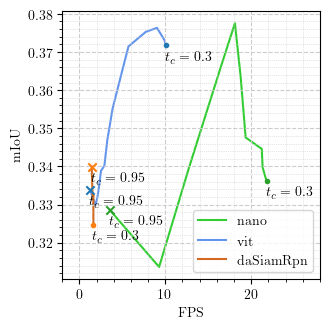

In [92]:
import matplotlib.figure

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

make_plot(sensitivity_study_performance_threshold, key_x="fps", key_y="iou", ax_glob=ax_glob, add_to_global=True, tex_mode=False, preset=mode)
plt.savefig(f"{mode}.pgf",bbox_inches='tight')

# swith back to the default backend
matplotlib.use("module://ipykernel.pylab.backend_inline")
make_plot(sensitivity_study_performance_threshold, key_x="fps", key_y="iou", ax_glob=ax_glob, add_to_global=True, tex_mode=False, preset=mode)

# save as pdf
plt.tight_layout()
plt.savefig(f"{mode}.pdf")




In [93]:
non_threshold_trackers = ["csrt", "goturn", "mil"]
print(f" Threshold: {threshold_trackers}")
print(f" Non-Threshold: {non_threshold_trackers}")

 Threshold: ['nano', 'vit', 'daSiamRpn']
 Non-Threshold: ['csrt', 'goturn', 'mil']


In [94]:
precision = 3 # digits after the comma

# for threshold enabled trackers: get the run with the highest IoU. 
# get all runs with non threshold trackers
# get the run with the highest IoU
# get the run with the highest FPS
# get the run with the highest MOTP

# get the run with the highest IoU
all_names = set([sensitivity_study_performance[run]["hydra_config"]["cv_tracker"]["name"] for run in sensitivity_study_performance.keys()])
max_iou_runs = {}
for tracker in threshold_trackers:
    max_iou = 0
    result_dict = {}
    for run in sensitivity_study_performance.keys():
        accept_run=False
        if sensitivity_study_performance[run]["hydra_config"]["cv_tracker"]["name"] == tracker:
            if sensitivity_study_performance[run]["iou"] > max_iou:
                accept_run = True
                max_iou = sensitivity_study_performance[run]["iou"]
        
        #if sensitivity_study_performance[run]["hydra_config"]["cv_tracker"]["name"] not in threshold_trackers:
        #    accept_run = True
        #    tracker = sensitivity_study_performance[run]["hydra_config"]["cv_tracker"]["name"]
            
        if accept_run:
            max_iou = sensitivity_study_performance[run]["iou"]
            result_dict["run"] = run
            result_dict["iou"] = max_iou
            result_dict["fps"] = sensitivity_study_performance[run]["fps"]
            result_dict["free_fps"] = sensitivity_study_performance[run]["free_fps"]
            result_dict["threshold"] = sensitivity_study_performance[run]["hydra_config"]["cv_tracker"]["threshold"]
            max_iou_runs[tracker] = result_dict
            

for tracker in non_threshold_trackers:
    for run in sensitivity_study_performance.keys():
        result_dict = {}
        if sensitivity_study_performance[run]["hydra_config"]["cv_tracker"]["name"] == tracker:
            print(f"Tracker: {tracker}, Run: {run}, IoU: {sensitivity_study_performance[run]['iou']}")
            max_iou = sensitivity_study_performance[run]["iou"]
            result_dict["run"] = run
            result_dict["iou"] = max_iou
            result_dict["fps"] = sensitivity_study_performance[run]["fps"]
            result_dict["free_fps"] = sensitivity_study_performance[run]["free_fps"]
            result_dict["threshold"] = sensitivity_study_performance[run]["hydra_config"]["cv_tracker"]["threshold"]
            max_iou_runs[tracker] = result_dict
            break

# apply the precision
for tracker in max_iou_runs.keys():
    for key in max_iou_runs[tracker].keys():
        if key != "run":
            try: 
                max_iou_runs[tracker][key] = round(max_iou_runs[tracker][key], precision)
            except:
                max_iou_runs[tracker][key] = "---"
        


Tracker: csrt, Run: 39, IoU: 0.22910961281604655
Tracker: goturn, Run: 78, IoU: 0.09130103571612827
Tracker: mil, Run: 40, IoU: 0.15309367021587272


In [95]:
# make a table with the results
import pandas as pd

table = pd.DataFrame(max_iou_runs)
table = table.T
table = table.drop(columns=["run"])
# put the threshold in the first column
table = table[["threshold", "iou", "fps", "free_fps"]]
table = table.rename(columns={"threshold":r"$t_c$", "iou": "IoU", "fps": "FPS", "free_fps": r"$\text{FPS}_\text{Edge}$"})
table  = table.sort_values(by="IoU", ascending=False)
# set precision to 3 digits
table = table.round(2)
# convert to str 
table = table.astype(str)
table.to_latex("frontend.tex")
table


,$t_c$,IoU,FPS,$\text{FPS}_\text{Edge}$
nano,0.7,0.378,18.101,29.487
vit,0.4,0.376,9.034,20.442
daSiamRpn,0.9,0.34,1.434,2.122
csrt,---,0.229,7.276,9.704
mil,---,0.153,6.034,7.202
goturn,---,0.091,2.722,3.006


In [96]:
multirun_data["0"]["frames"]

12265

In [97]:
raise NotImplementedError("Stop here")

NotImplementedError: Stop here

### Re-init sensitivity study

#### Load Data & Calculate Metrics

In [12]:
multirun_data, mot_metrics_summary = multirun_pipeline(re_init_sensitivity_study)

In [13]:
mot_metrics_summary

,motp,num_frames,mota
9,79.409435,12604,0.999048
10,78.607844,12604,0.998731
1,81.776130,12604,0.995398
5,79.947525,12604,0.997540
0,81.186096,12604,0.994288
6,76.731263,12604,0.997620
7,85.974207,12604,0.998017
3,80.575302,12604,0.996985
8,78.712035,12604,0.999207
4,79.225236,12604,0.998413


#### Generate the data

In [14]:
relevant_keys = ["iou", "fps", "motp"]
sensitivity_study_performance = gather_data_from_runs(multirun_data, relevant_keys)



#### Plot the data

In [15]:
make_plot(sensitivity_study_performance, key_x="fps", key_y="iou", add_to_global=True)
make_plot(sensitivity_study_performance, key_x="fps", key_y="motp")

TypeError: make_plot() missing 1 required positional argument: 'ax_glob'

# Naive Baseline

In [ ]:
single_run_data = load_run(naive_baseline)

In [ ]:
single_run_data["raw_data"].keys()

# Apply the aggregation functions
# IoU
single_run_data = apply_to_level_run(single_run_data, func=frame_iou, level="frame", key_name="iou") # calculate iou for every frame
single_run_data = apply_to_level_run(single_run_data, func=average_iou, level="sequence", key_name="iou") # calculate mean iou for every sequence
single_run_data = apply_to_level_run(single_run_data, func=average_iou, level="run", key_name="iou") # calculate mean iou for every run


# FPS
single_run_data = apply_to_run(single_run_data, mean_fps, "fps") # calculate fps for every sequence
single_run_data = apply_to_level_run(single_run_data, func=average_fps, level="run", key_name="fps") # calculate mean fps for every run




NameError: name 'average_iou' is not defined

In [ ]:
print(f"iou: {single_run_data['iou']}")
print(f"fps: {single_run_data['fps']}")

# plot 
x = single_run_data["fps"]
y = single_run_data["iou"]

ax_glob.scatter(x, y)
ax_glob.annotate("Naive Baseline", (x, y), textcoords='offset pixels')


iou: 0.4884428288971474
fps: 3.490290030064569


/tmp/ipykernel_134115/2319078902.py:9: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax_glob.annotate("Naive Baseline", (x, y), textcoords='offset pixels')


Text(3.490290030064569, 0.4884428288971474, 'Naive Baseline')

# Deva

In [ ]:
single_run_data = load_run(deva_baseline)

In [ ]:
single_run_data["raw_data"].keys()

# Apply the aggregation functions
# IoU
single_run_data = apply_to_level_run(single_run_data, func=frame_iou, level="frame", key_name="iou") # calculate iou for every frame
single_run_data = apply_to_level_run(single_run_data, func=average_iou, level="sequence", key_name="iou") # calculate mean iou for every sequence
single_run_data = apply_to_level_run(single_run_data, func=average_iou, level="run", key_name="iou") # calculate mean iou for every run


# FPS
single_run_data = apply_to_run(single_run_data, mean_fps, "fps") # calculate fps for every sequence
single_run_data = apply_to_level_run(single_run_data, func=average_fps, level="run", key_name="fps") # calculate mean fps for every run

In [ ]:
print(f"iou: {single_run_data['iou']}")
print(f"fps: {single_run_data['fps']}")

# plot 
x = single_run_data["fps"]
y = single_run_data["iou"]

ax_glob.scatter(x, y)
ax_glob.annotate("DEVA", (x, y), textcoords='offset pixels')

iou: 0.5378233644775245
fps: 1.9288729549409567


/tmp/ipykernel_134115/2896605039.py:9: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax_glob.annotate("DEVA", (x, y), textcoords='offset pixels')


Text(1.9288729549409567, 0.5378233644775245, 'DEVA')

### Export Global Plot

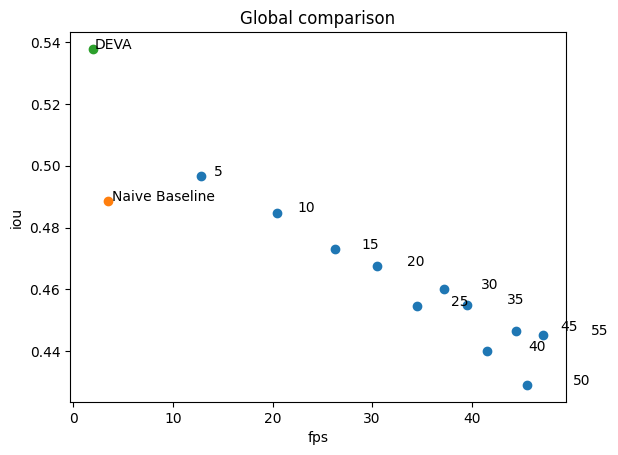

In [ ]:
# make global plot
ax_glob.set_xlabel("fps")
ax_glob.set_ylabel("iou")
ax_glob.set_title("Global comparison")
fig_glob